## Imports

In [11]:
import numpy as np

# Import the EchoStateNetwork class (assuming it is saved in `esn.py` in the same directory)
from ESN_class_main import EchoStateNetwork

In [12]:
# Network parameters for testing.
ESN_params = {
        'input_dim': 10,           # Number of input features
        'nodes': 1000,              # Number of reservoir neurons
        'output_dim': 1,           # Number of output features
        'ridge': 1e-6,             # Regularization parameter for ridge regression
        'leak': 0.3,               # Leaking rate
        'connectivity': 0.1,       # Connectivity of the reservoir
        'input_scaling': 0.5,      # Scaling factor for input weights
        'spectral_radius': 0.9,    # Desired spectral radius of the reservoir
        'seed': 42,                # Random seed for reproducibility
        'train_length': 500,       # Number of training steps
        'prediction_length': 100 ,  # Number of prediction steps
        'dtype': 'float64',
        'enable_forcing': False
    }

## Testing correct weight generation

In [13]:
def test_weight_generation(ESN_params=ESN_params):

    # Create an instance of EchoStateNetwork
    esn = EchoStateNetwork(ESN_params, verbose=2)

    # Test 1: Initialising reservoir with normal distribution
    print("\nTesting with Normal Distribution:")
    W_res_normal = esn.initialize_reservoir(distribution='normal')
    print(f"Spectral radius after scaling: {np.max(np.abs(np.linalg.eigvals(W_res_normal.toarray()))):.4f}")

    # Test 2: Initialising reservoir with uniform distribution
    print("\nTesting with Uniform Distribution:")
    W_res_uniform = esn.initialize_reservoir(distribution='uniform')
    print(f"Spectral radius after scaling: {np.max(np.abs(np.linalg.eigvals(W_res_uniform.toarray()))):.4f}")


Testing with Normal Distribution:
[[False False False ...  True False False]
 [ True False False ... False False False]
 [False False False ... False False  True]
 ...
 [False False False ...  True False False]
 [False False False ... False False False]
 [False False False ... False False False]]
Reservoir adjacency matrix initialized. Beginning spectral radius scaling.
The largest eigenvalue of this matrix was: 2.394710819553915
Reservoir spectral radius scaled to: 0.9235090234124206
Reservoir weights initialized.


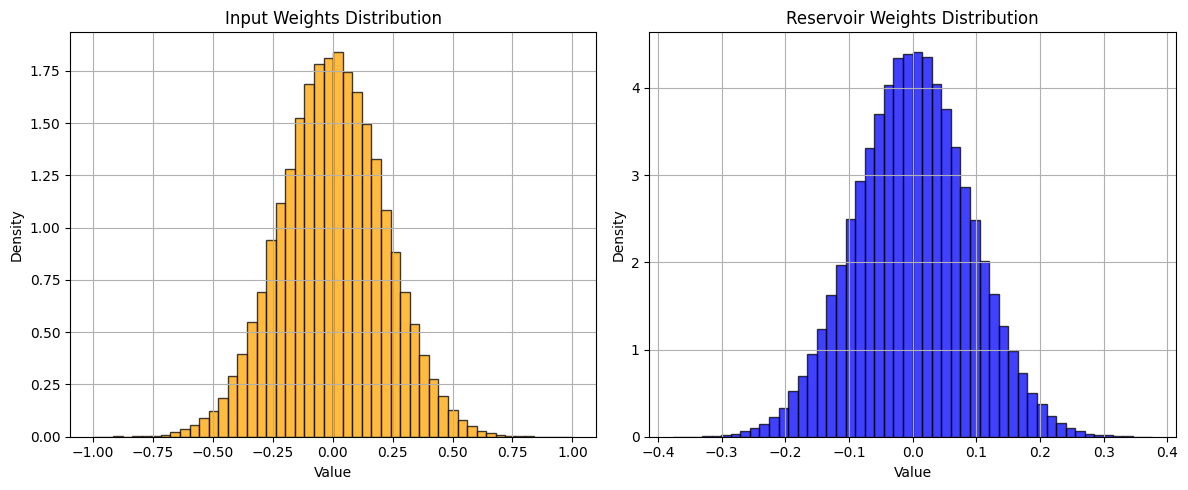

Spectral radius after scaling: 0.9235

Testing with Uniform Distribution:
[[False False  True ... False False False]
 [ True  True False ... False False False]
 [False False False ... False False False]
 ...
 [False False False ... False False False]
 [False  True False ... False False False]
 [False False False ... False False False]]
Reservoir adjacency matrix initialized. Beginning spectral radius scaling.
The largest eigenvalue of this matrix was: 5.937873957088642
Reservoir spectral radius scaled to: 0.8910998422082069
Reservoir weights initialized.


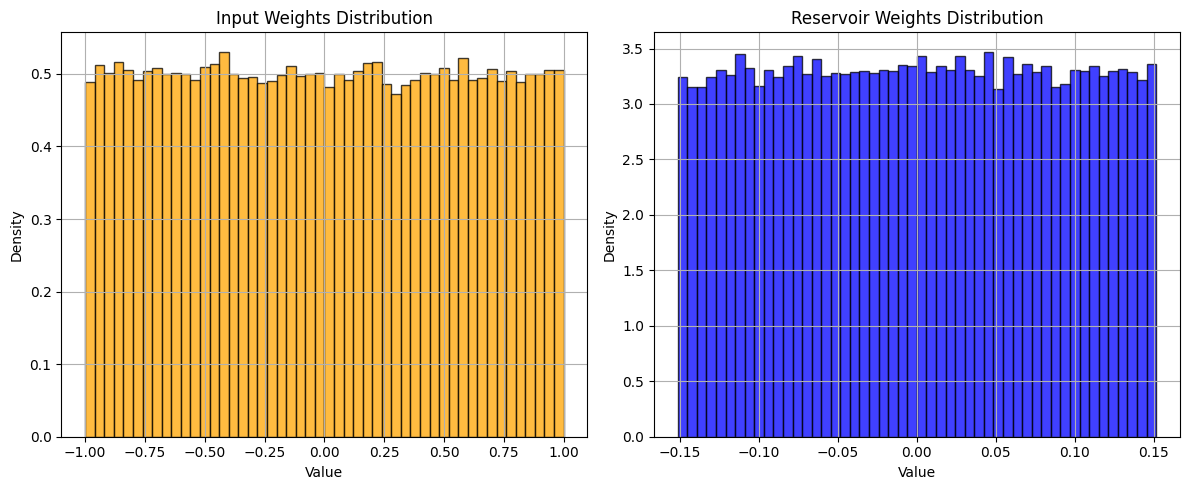

Spectral radius after scaling: 0.9000


In [14]:
test_weight_generation()

## Checking for consistency between iterations.

In [15]:
# Checking for consistency between iterations:
esn1 = EchoStateNetwork(ESN_params, verbose=1)
esn1.initialize_reservoir()
esn2 = EchoStateNetwork(ESN_params, verbose=1)
esn2.initialize_reservoir()
print(np.allclose(esn1.W_res.data, esn2.W_res.data))  # Should print True

[[False False False ...  True False False]
 [ True False False ... False False False]
 [False False False ... False False  True]
 ...
 [False False False ...  True False False]
 [False False False ... False False False]
 [False False False ... False False False]]
Reservoir adjacency matrix initialized. Beginning spectral radius scaling.
The largest eigenvalue of this matrix was: 2.3947108195767703
Reservoir spectral radius scaled to: 0.8971299538264883
Reservoir weights initialized.
[[False False False ...  True False False]
 [ True False False ... False False False]
 [False False False ... False False  True]
 ...
 [False False False ...  True False False]
 [False False False ... False False False]
 [False False False ... False False False]]
Reservoir adjacency matrix initialized. Beginning spectral radius scaling.
The largest eigenvalue of this matrix was: 2.457263389234413
Reservoir spectral radius scaled to: 0.8770894268176636
Reservoir weights initialized.
False
